In [3]:
import sqlite3
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from pandas import DataFrame

QUERY = """
SELECT o_time AS "time", i_qty AS "qty"
FROM orders
GROUP BY o_order_id, o_time
ORDER BY o_order_id
"""

In [5]:
try:
    conn = sqlite3.connect('db/orders_en_GB.db')
    res = conn.execute(QUERY)

    df = DataFrame(res.fetchall())
    print(df)

    df['hour'] = df[0].apply(lambda x: int(x.split(':')[0]))
    df['minute'] = df[0].apply(lambda x: int(x.split(':')[1]))
    df['value'] = df[1].apply(lambda x: float(x))
    del df[0]
    del df[1]
    print(df)
finally:
    if conn:
        conn.close()

                 0         1
0   20:42:29+02:00  1.000000
1   00:26:51+02:00  2.000000
2   11:21:55+02:00  3.000000
3   12:07:10+02:00  2.000000
4   14:49:52+02:00  2.000000
5   15:06:57+02:00  2.000000
6   16:09:52+02:00  6.000000
7   16:33:38+02:00  1.000000
8   16:43:09+02:00  2.000000
9   18:08:20+02:00  1.000000
10  19:03:53+02:00  2.000000
11  19:28:52+02:00  5.000000
12  20:53:42+02:00  3.000000
13  21:09:06+02:00  8.000000
14  21:12:47+02:00  5.000000
15  21:48:29+02:00  5.000000
16  21:59:10+02:00  2.000000
17  23:37:07+02:00  2.000000
18  00:27:29+02:00  1.000000
19  08:02:28+02:00  2.000000
20  15:26:36+02:00  2.000000
21  15:45:56+02:00  1.000000
22  15:51:45+02:00  2.000000
23  16:14:19+02:00  1.000000
24  16:24:17+02:00  1.000000
25  16:24:29+02:00  5.000000
26  17:31:56+02:00  2.000000
27  17:37:23+02:00  1.000000
28  20:20:53+02:00  2.000000
29  21:01:01+02:00  1.000000
    hour  minute  value
0     20      42    1.0
1      0      26    2.0
2     11      21    3.0
3    

In [6]:
pt = df.pivot_table(index='minute', columns='hour', values='value', aggfunc='sum').fillna(0)
print(pt)

hour     0    8    11   12   14   15   16   17   18   19   20   21   23
minute                                                                 
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2       0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0
6       0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7       0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
9       0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0  0.0  8.0  0.0
12      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0
14      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
20      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0
21      0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
24      0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0  0.0  0

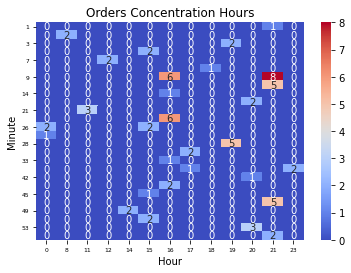

In [8]:
hm = sb.heatmap(pt, annot=True, cmap="coolwarm")
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=8)
hm.set_xticklabels(hm.get_xticklabels(), rotation=0, fontsize=8)

plt.title('Orders Concentration Hours')
plt.ylabel('Minute')
plt.xlabel('Hour')
plt.grid(False)